# Week 6 Lab: Unsupervised Learning

<img align="right" style="padding-right:10px;" src="figures_wk6/kmeans.png" width=300><br>

This week's assignment will focus completeing a K-Means analysis.

## Our Dataset: 
**Dataset:** wine_fraud.csv(Provided in folder assign_wk6)

Remember to take a look at the wine.names files for a better understanding of the dataset. You can also read more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/wine).


## Unsupervised Learning

**Objective:** 
   - Use K-Means for this analysis: State and defend all your assumptions about the dataset. Defend yourself!!!
       * Make sure you cleanup your data, including the readability of your dataset
       * EDA!!!  Explore your data!
       * Categorical vs numeric columns in your dataset
       * Would normalizing your dataset help? 
   - Cluster the wines to see if there are some natural groupings
   - Use PCA to plot the clusters
   - Discover any insights from this analysis? (include numbers/graphs corresponding to your reasoning)
       * Summarize your findings.
       * What does the PCA plot tell you about your clustering?


### Deliverables:

Upload your notebook's .ipynb file (This assignment can be done in one or two notebooks. The choice it up to you!) 
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set()

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Firstly removed the titles(V1, V2...) in excel file
# Then, assigning column names to the dataset 
names = ['Cultivator', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
         'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

# Read dataset to pandas dataframe
df = pd.read_csv('C:/Users/Asmita Bamma/Downloads/assign_wk6/assign_wk6/wine_fraud.csv', names=names)
df.head(10)

,Cultivator,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


# Some EDA

In [3]:
# no. of rows and columns
df.shape

(178, 14)

There are altogether 178 rows and 14 columns in this dataset.

In [5]:
df.describe()

,Cultivator,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


array([[<AxesSubplot:title={'center':'Cultivator'}>,
        <AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Malic acid'}>,
        <AxesSubplot:title={'center':'Ash'}>],
       [<AxesSubplot:title={'center':'Alcalinity of ash'}>,
        <AxesSubplot:title={'center':'Magnesium'}>,
        <AxesSubplot:title={'center':'Total phenols'}>,
        <AxesSubplot:title={'center':'Flavanoids'}>],
       [<AxesSubplot:title={'center':'Nonflavanoid phenols'}>,
        <AxesSubplot:title={'center':'Proanthocyanins'}>,
        <AxesSubplot:title={'center':'Color intensity'}>,
        <AxesSubplot:title={'center':'Hue'}>],
       [<AxesSubplot:title={'center':'OD280/OD315 of diluted wines'}>,
        <AxesSubplot:title={'center':'Proline'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

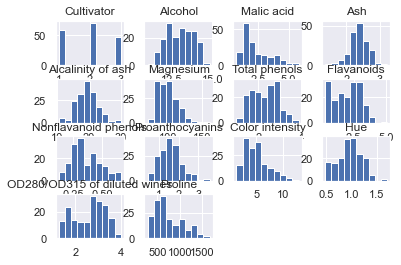

In [10]:
# Plotting histogram to understand the data better
df.hist()

We can see that most of them do not have bell shaped curve which shows data are not normally distributed.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cultivator                    178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

From the above results, we can see that the non-null count are even. There are no missing values in any of the columns. Also, there are no categorical data types. We are ready to move further.

# K-means Analysis

Splitting into features and columns

In [56]:
# split data into features (X) and labels (y)
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [57]:
# Using within sum of squares to determine the optimal number of clusters for the final model. 

# import stuff
from sklearn.cluster import KMeans

# determine the optimal number of clusters 
sum_sq= []

# fit the model for a range of 2 to 30 clusters and add to sum_sq[]
for n in range (2,30):
    print('Calculating for ',n,' clusters')
    
    # random_start makes the results reproducible 
    # n_jobs=-1 means run with all machine processors
    model = KMeans(n_clusters=n, random_state=42, n_jobs=-1)
    model.fit(X)
    sum_sq.append(-model.score(X))

Calculating for  2  clusters
Calculating for  3  clusters
Calculating for  4  clusters
Calculating for  5  clusters
Calculating for  6  clusters
Calculating for  7  clusters
Calculating for  8  clusters
Calculating for  9  clusters
Calculating for  10  clusters
Calculating for  11  clusters
Calculating for  12  clusters
Calculating for  13  clusters
Calculating for  14  clusters
Calculating for  15  clusters
Calculating for  16  clusters
Calculating for  17  clusters
Calculating for  18  clusters
Calculating for  19  clusters
Calculating for  20  clusters
Calculating for  21  clusters
Calculating for  22  clusters
Calculating for  23  clusters
Calculating for  24  clusters
Calculating for  25  clusters
Calculating for  26  clusters
Calculating for  27  clusters
Calculating for  28  clusters
Calculating for  29  clusters


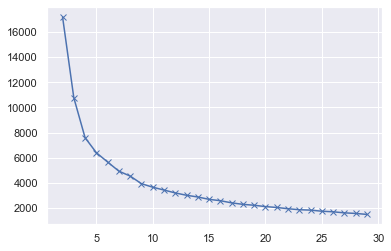

In [58]:
# making our scree plot to visually see the optimal number of clusters

plt.plot(range(2, 30), sum_sq, 'bx-')
# np.diff(sum_sq)
# sum_sq

looking at where the measure of model quality change slows down is between 0 and 5. There is change in the slope.The first place this is happening is around k=3.

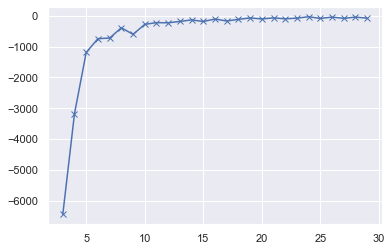

In [59]:
# comparing the scree plot with a np.diff() plot to confirm the k value

plt.plot(range(3, 30), np.diff(sum_sq), 'bx-')

In this plot, we can see the flat spot is around 5. This plot has given better graph illustration. So, we will use k value as 5 and move further.

# Rerunning with our optimal k value

In [60]:
# kmeans model with the optimal number of clusters, 10 clusters
model = KMeans(n_clusters=5, random_state=42, n_jobs=-1)
model.fit(X)

# gather the predictions
preds= model.predict(X)

In [61]:
# finding the silhouette score for this dataset
from sklearn import metrics
score = metrics.silhouette_score(X, preds)
score

0.32687111677736874

A value of approximately 0.3269 shows that our sample is close to the decision boundary between two neighboring clusters . This is not a good result since the silhouette score far from the ideal score which is +1. We can perform PCA visualization for better results. Since we have many features in our dataset PCA will help reduce the feature to avoid the curse of dimensionality.

# PCA Visualization

Text(0.5, 1.0, 'Projection of the clustering on a the axis of the PCA')

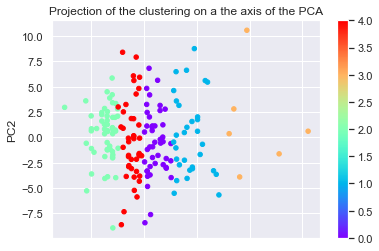

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_reduced = pca.fit_transform(X)
data_reduced = pd.DataFrame(data_reduced)

ax = data_reduced.plot(kind='scatter', x=0, y=1, c=preds, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection of the clustering on a the axis of the PCA')

Here, we can see that the clusters are overlapping which is not good. We can better the results by finding the best k value and rerunning visualization test. We can find the best k value by finding the highest silhouette score shown below:

In [63]:
# fit the model for a range of 2 to 30 clusters and add to sum_sq[]
for n in range (2,30):
    # random_state makes the results reproducible 
    # n_jobs=-1 means run with all machine processors
    model = KMeans(n_clusters=n, random_state=42, n_jobs=-1)
    model.fit(X)
    # gather the predictions
    preds= model.predict(X)
    score = metrics.silhouette_score(X, preds)
    print('Silhouette score for ',n,' clusters: ',score)

Silhouette score for  2  clusters:  0.5027740345905246
Silhouette score for  3  clusters:  0.42234402547998706
Silhouette score for  4  clusters:  0.4160373487428032
Silhouette score for  5  clusters:  0.32687111677736874
Silhouette score for  6  clusters:  0.3011991392992732
Silhouette score for  7  clusters:  0.2982014850691219
Silhouette score for  8  clusters:  0.27782353980614266
Silhouette score for  9  clusters:  0.29302178964645814
Silhouette score for  10  clusters:  0.2866332629373141
Silhouette score for  11  clusters:  0.2744532742619635
Silhouette score for  12  clusters:  0.2726998286936045
Silhouette score for  13  clusters:  0.2600550115104791
Silhouette score for  14  clusters:  0.25534822608617824
Silhouette score for  15  clusters:  0.2766099654669359
Silhouette score for  16  clusters:  0.25248763514356615
Silhouette score for  17  clusters:  0.26231208800161676
Silhouette score for  18  clusters:  0.2580739733607541
Silhouette score for  19  clusters:  0.2660595754

We can clearly see that 2 clusters has performed the best result with the higest silhouette score. So, we will use this k value for PCA plot and see if it makes any difference.

In [64]:
# kmeans model with the optimal number of clusters, 2 clusters
model = KMeans(n_clusters=2, random_state=42, n_jobs=-1)
model.fit(X)

# gather the predictions
preds= model.predict(X)

from sklearn import metrics
score = metrics.silhouette_score(X, preds)
score

0.5027740345905246

Text(0.5, 1.0, 'Projection of the clustering on a the axis of the PCA')

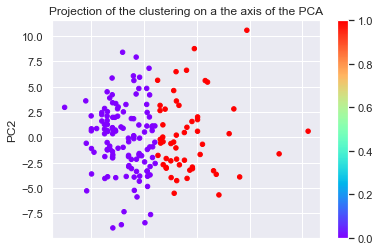

In [66]:
# visualizing the clusters
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(X)
data_reduced = pd.DataFrame(data_reduced)

ax = data_reduced.plot(kind='scatter', x=0, y=1, c=preds, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection of the clustering on a the axis of the PCA')

This looks so much better than the previous result, although some bubbles are touching each other but most of them are separated from neighbouring cluster.Overall, cluster 2 has given the best result with no overlapping of the bubbles. For our dataset this means the data are properly separated based on their similarilty. In fact, the quantities of 13 constituents in each of the three types of wines are grouped based on their similarities.